Time for today is:
2022-08-30
Your Portfolio:
Consist of 4 assets :
GE   -General Electronics
JPM  -JPMorgan Chase & Co.
MSFT -Microsoft Corporation
C    -Citigroup Inc.
The Stock Prices:
Symbols             GE         JPM        MSFT          C
Date                                                     
2015-01-02  167.553238   50.755451   40.926449  45.591724
2015-01-05  164.477661   49.179745   40.550091  44.154892
2015-01-06  160.933990   47.904560   39.954926  42.600437
2015-01-07  161.000885   47.977661   40.462563  42.995354
2015-01-08  162.939835   49.049789   41.652889  43.642342
...                ...         ...         ...        ...
2022-08-24   76.739998  115.800003  275.790009  51.009998
2022-08-25   78.139999  118.550003  278.850006  52.060001
2022-08-26   75.269997  114.669998  268.089996  49.779999
2022-08-29   76.050003  114.389999  265.230011  49.369999
2022-08-30   75.129997  114.410004  262.970001  49.080002

[1929 rows x 4 columns]


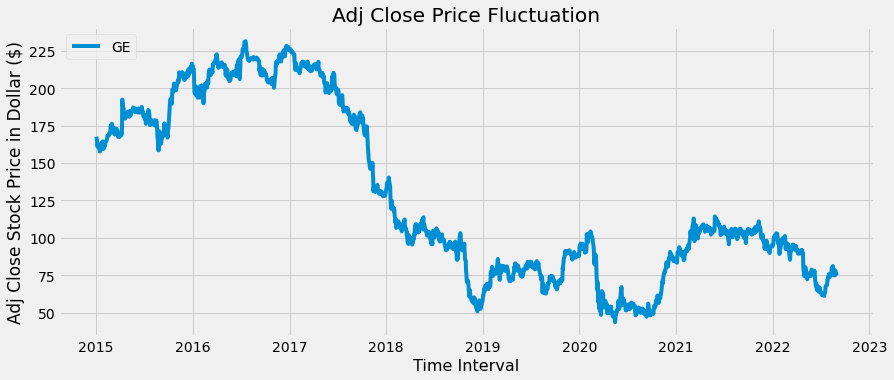

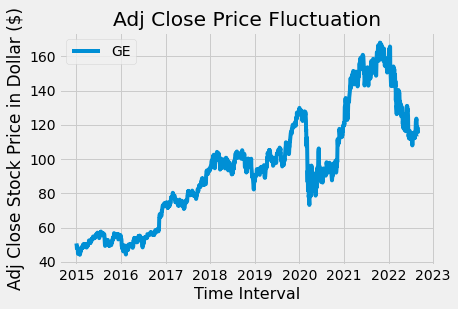

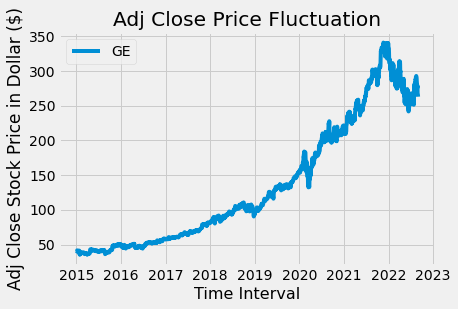

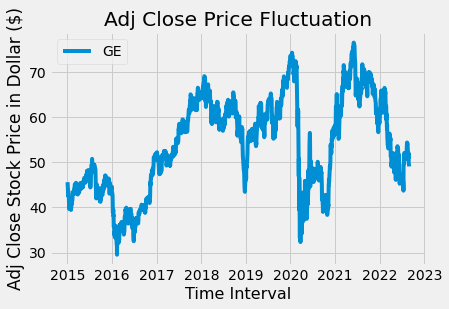

None
Daily Returns:
Symbols           GE       JPM      MSFT         C
Date                                              
2015-01-02       NaN       NaN       NaN       NaN
2015-01-05 -0.018356 -0.031045 -0.009196 -0.031515
2015-01-06 -0.021545 -0.025929 -0.014677 -0.035205
2015-01-07  0.000416  0.001526  0.012705  0.009270
2015-01-08  0.012043  0.022346  0.029418  0.015048
...              ...       ...       ...       ...
2022-08-24  0.008410  0.002424 -0.002351  0.001178
2022-08-25  0.018243  0.023748  0.011095  0.020584
2022-08-26 -0.036729 -0.032729 -0.038587 -0.043796
2022-08-29  0.010363 -0.002442 -0.010668 -0.008236
2022-08-30 -0.012097  0.000175 -0.008521 -0.005874

[1929 rows x 4 columns]
The Sample Correlation:
Symbols        GE       JPM      MSFT         C
Symbols                                        
GE       1.000000  0.567337  0.329974  0.581354
JPM      0.567337  1.000000  0.486731  0.886416
MSFT     0.329974  0.486731  1.000000  0.475172
C        0.581354  0.886416 

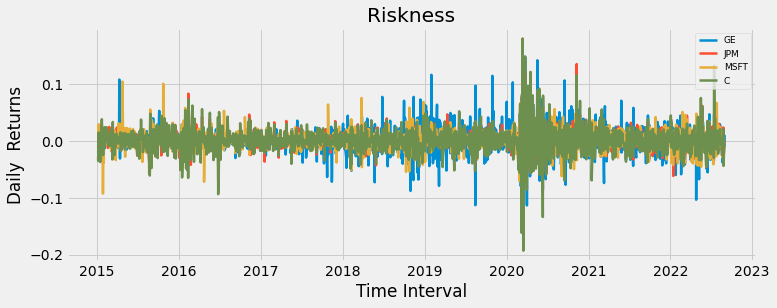

The Mean for daily returns: 
Symbols
GE     -0.000147
JPM     0.000583
MSFT    0.001117
C       0.000275
dtype: float64
Expected daily returns for investment: 0.00045666263752409156
Annual expected return for investment : 0.11553564729359517
The cumulative simple return:
Symbols           GE       JPM      MSFT         C
Date                                              
2015-01-02       NaN       NaN       NaN       NaN
2015-01-05  0.981644  0.968955  0.990804  0.968485
2015-01-06  0.960495  0.943831  0.976262  0.934390
2015-01-07  0.960894  0.945271  0.988665  0.943052
2015-01-08  0.972466  0.966395  1.017750  0.957243
...              ...       ...       ...       ...
2022-08-24  0.458004  2.281528  6.738674  1.118843
2022-08-25  0.466359  2.335710  6.813443  1.141874
2022-08-26  0.449230  2.259265  6.550532  1.091865
2022-08-29  0.453886  2.253748  6.480650  1.082872
2022-08-30  0.448395  2.254142  6.425429  1.076511

[1929 rows x 4 columns]


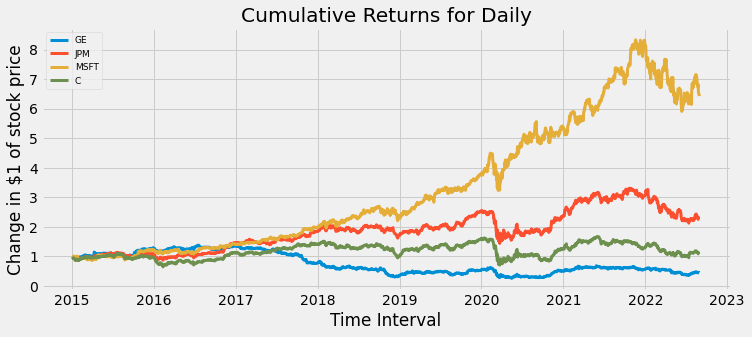

In [45]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

# Import company stocks for investment
invest = ["GE", "JPM", "MSFT", "C"]

# Find starting date for investment
sd_invest = '01.01.2015'

# Find Date for Today as in form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')
print("Time for today is:")
print(today)

# Calculate how many assets are in your portfolio 
num_invest = len(invest)

# Show how many assets the portfolio consist of
print("Your Portfolio:")
print('Consist of '+ str(num_invest)+ ' assets :')
# Define Company keywords meaning
print('GE   -General Electronics')
print('JPM  -JPMorgan Chase & Co.')
print('MSFT -Microsoft Corporation')
print('C    -Citigroup Inc.')

# Make a function for import stock prices from yahoo finance for investment
def funct(tickers= invest, begin = sd_invest, finish = today, price='Adj Close'):
    df =  web.DataReader(tickers, 'yahoo', begin, finish)[price]
    return df                                               
    







    
# Find Adjusted Close Price for Investment
my_invest = funct(invest)
# Get The Stock Prices 
print("The Stock Prices:")
print (my_invest)





# Make a graph for visual view to stocks price chnage
def figure(tickers= invest,begin=sd_invest, finish=today, price='Adj Close'):
    

  # Write the heading
    heading =  price + ' Price Fluctuation'
  
  # import stcks
    my_invest = funct(tickers, begin, finish, price)
  
  # Visual view to price change
    plt.figure(figsize=(13,5.3)) 
  # Loop tickers and find plotting the Adj Close day after day
    for i in my_invest.columns.values:
        plt.plot( my_invest[i],  label=i)

        plt.title(heading)
        plt.xlabel('Time Interval',fontsize=16)
        plt.ylabel(price +' Stock Price in Dollar ($)',fontsize=17)
        plt.legend(my_invest.columns.values, loc='upper left')
        plt.show()
# Visual view for the adjusted close price of Portfolio
print (figure(invest))


# Find daily returns
returns_daily = my_invest.pct_change(1)
print("Daily Returns:")
print (returns_daily)

# Find correlation among stocks
print("The Sample Correlation:")
print (returns_daily.corr())


# Find the co-variance matrix for daily returns
print("The Simple Daily Returns Co-variance matrix:")
print (returns_daily.cov())

# Find Var
print("The Sample Variance According to companies:")
print (returns_daily.var())

# Find SD or volatility
print("The Sample Volatility According to companies:")
print (returns_daily.std())


# Visual view for  daily simple returns / volatility 
plt.figure(figsize=(11,4)) #Create graph size
# Loop tickers and find plotting the simple returns day after day
for i in returns_daily.columns.values:
    plt.plot(returns_daily.index, returns_daily[i], lw=2.5, label=i)
# Make graph fontsize =9 and legend upper-right
plt.legend(loc='upper right', fontsize=9)
plt.title('Riskness')#volt-risk
plt.ylabel('Daily  Returns') #Daily returns for Y-axis 
plt.xlabel('Time Interval') #begin#finish
plt.show()


# Find mean or average for the daily simple return
mean_daily = returns_daily.mean()
# Print it
print("The Mean for daily returns: ")
print(mean_daily)

# Find investment daily profitability according weights/expected returns
# 25% GE, 25% JPM, 25% MSFT, 25% C
Wghts = np.array([0.25, 0.25, 0.25,0.25])
invest_daily_return = np.sum(mean_daily*Wghts) 
# Print it
print("Expected daily returns for investment: "+str(invest_daily_return))


# Find expected returns for annual
print("Annual expected return for investment : "+ str(invest_daily_return * 253))

# Find change in my portfolio
cumulative_daily = (returns_daily+1).cumprod()
# Print cumultv. daily return
print ("The cumulative simple return:")
print (cumulative_daily)


# Visual view for cumul. simple returns for daily
fig = plt.figure(figsize=(11,4.5))
for i in cumulative_daily.columns.values:
    plt.plot(cumulative_daily.index, cumulative_daily[i], lw=3, label=i)
# Make graph fontsize =9 and legend upper-left
plt.legend(loc='upper left', fontsize=9)
plt.xlabel("Time Interval")
plt.ylabel("Change in $1 of stock price")
plt.title("Cumulative Returns for Daily")
plt.show()

